In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
""" ORIGINAL
Plots colormap of mean error across cases in (BE, SW) space.

Input: resolution of registration ('MT' or 'MT-HiRes') and type of Error ('ASD', 'DHD', 'Dice')
Output: colormap plot
"""

def Plot_Population_GlobalErrors(Res, Error):
    
    Res = str(Res)
    Error = str(Error)
    
    if Error == 'ASD':
        csv_name = 'Normal-Distance-Results'
        
    elif Error == 'DHD':
        csv_name = 'Hausdorff-Distance-Results'
        
    elif Error == 'Dice':
        csv_name = 'Dice-Results'
        
    else:
        print("Error should be one of: ASD, DHD. Dice.")
    
    total_array = np.zeros(shape=(9,7))
    
    for Case in ['01', '02', '05', '06', '07', '08', '09', '12', '15', '16']:
    
        df_read = pd.read_csv(f'/home/csi20local/Data/RG_CT_Cases/CT-CRT-{Case}/{Res}-{csv_name}.csv', 
                    sep = ' ', index_col = 0)

        df_array = df_read.to_numpy()

        total_array = total_array + df_array
        
    total_array = total_array / 10.0
    
    fig, ax1 = plt.subplots(figsize = (3,3))
    
    if csv_name == 'Dice-Results':
        p = ax1.imshow(total_array, cmap = 'gist_heat')
    
    else:
        p = ax1.imshow(total_array, cmap = 'gist_heat_r')
    
    ax1.set_xticks(ticks = list(np.arange(0,7,1)))
    ax1.set_xticklabels(labels = ['9e-2', '3e-2', '9e-3', '3e-3', '9e-4', ' 3e-4', '0.0'], rotation=45)
    ax1.set_xlabel('Sparsity Weight')

    ax1.set_yticks(ticks = list(np.arange(0,9,1)))
    ax1.set_yticklabels(labels = ['4e-6', '1e-6', '4e-7', '1e-7', '4e-8', '1e-8', '4e-9', ' 1e-9', '4e-10'], rotation=45)
    ax1.set_ylabel('Bending Energy')

    ax1.set_title(f'BE SW Search: {Res} {csv_name}')
    
    ErrorUnits = {
      "ASD": "[mm]",
      "DHD": "[mm]",
      "Dice": ""
    }
    
    cb = fig.colorbar(p, ax=ax1)
    units = ErrorUnits[f'{Error}']
    cb.set_label(f'Mean {Error} {units}')

    plt.show()

In [20]:
"""
Plots colormap of MEDIAN error across cases in (BE, SW) space.

Input: resolution of registration ('MT' or 'MT-HiRes') and type of Error ('ASD', 'DHD', 'Dice')
Output: colormap plot
"""

def Plot_Population_Errors_Median(Res, Error):
    
    Res = str(Res)
    Error = str(Error)
        
    error_dict = {'ASD': 'Normal-Distance-Results', 'DHD': 'Hausdorff-Distance-Results', 'Dice': 'Dice-Results',
                 'LAA': 'LAA-AbsoluteError', 'LSPV': 'LSPV-AbsoluteError', 'LIPV': 'LIPV-AbsoluteError',
                 'RSPV': 'RSPV-AbsoluteError', 'RIPV': 'RIPV-AbsoluteError'}
    
    if Error == "LAA":
        Cases = ('01', '02', '05', '06', '07', '08', '12', '15', '16')
        
    else:
        Cases = ('01', '02', '05', '06', '07', '08', '09', '12', '15', '16')
    
    error = error_dict[Error]
    
    cases_array = np.zeros(shape=(63,10))
        
    Case_to_RowIndex = {'01' : 0, '02' : 1, '05' : 2, '06' : 3, '07' : 4, '08' : 5, '09' : 6, '12' : 7, '15' : 8, '16' : 9}
    
    for Case in Cases:
    
        df_read = pd.read_csv(f'/home/csi20local/Data/RG_CT_Cases/CT-CRT-{Case}/{Res}-{error}.csv', 
                        sep = ' ', index_col = 0)
        df_array = df_read.to_numpy()
        flattened_array = np.reshape(df_array, 63)
    
        cases_array[:, Case_to_RowIndex[Case]] = flattened_array
        
    medians = np.zeros(63)

    for i in range(0,cases_array.shape[0]):
        medians[i] = np.median(cases_array[i, :])
    
    mean = np.mean(medians)
    std = np.std(medians)
    
    total_array = np.reshape(medians, (9,7))

    fig, ax1 = plt.subplots(figsize = (3,3))
    
    if error == 'Dice-Results':
        p = ax1.imshow(total_array, cmap = 'gist_heat')
    
    else:
        p = ax1.imshow(total_array, cmap = 'gist_heat_r')
        
    
    ax1.set_xticks(ticks = list(np.arange(0,7,1)))
    ax1.set_xticklabels(labels = ['9e-2', '3e-2', '9e-3', '3e-3', '9e-4', ' 3e-4', '0.0'], rotation=45)
    ax1.set_xlabel('Sparsity Weight')

    ax1.set_yticks(ticks = list(np.arange(0,9,1)))
    ax1.set_yticklabels(labels = ['4e-6', '1e-6', '4e-7', '1e-7', '4e-8', '1e-8', '4e-9', ' 1e-9', '4e-10'], rotation=45)
    ax1.set_ylabel('Bending Energy')

    ax1.set_title(f'BE SW Search: {Res} {error}')
    
    ErrorUnits = {
      "ASD": "[mm]",
      "DHD": "[mm]",
      "Dice": "",
      "LAA": "[mm]",
      "LSPV": "[mm]",
      "LIPV": "[mm]",
      "RSPV": "[mm]",
      "RIPV": "[mm]"
    }
    
    cb = fig.colorbar(p, ax=ax1)
    units = ErrorUnits[f'{Error}']
    cb.set_label(f'Median {Error} {units}')

    plt.show()

In [19]:
"""
***ALTERED FOR AXIS FOR LOOP PLOTTING***

Plots colormap of MEDIAN error across cases in (BE, SW) space.

Input: resolution of registration ('MT' or 'MT-HiRes') and type of Error ('ASD', 'DHD', 'Dice')
Output: colormap plot
"""

def Plot_Population_Errors_Median_Axis(Res, Error, ax):
    
    Res = str(Res)
    Error = str(Error)
        
    error_dict = {'ASD': 'Normal-Distance-Results', 'DHD': 'Hausdorff-Distance-Results', 'Dice': 'Dice-Results',
                 'LAA': 'LAA-AbsoluteError', 'LSPV': 'LSPV-AbsoluteError', 'LIPV': 'LIPV-AbsoluteError',
                 'RSPV': 'RSPV-AbsoluteError', 'RIPV': 'RIPV-AbsoluteError'}
    
    if Error == "LAA":
        Cases = ('01', '02', '05', '06', '07', '08', '12', '15', '16')
        
    else:
        Cases = ('01', '02', '05', '06', '07', '08', '09', '12', '15', '16')
    
    error = error_dict[Error]
    
    cases_array = np.zeros(shape=(63,10))
        
    Case_to_RowIndex = {'01' : 0, '02' : 1, '05' : 2, '06' : 3, '07' : 4, '08' : 5, '09' : 6, '12' : 7, '15' : 8, '16' : 9}
    
    for Case in Cases:
    
        df_read = pd.read_csv(f'/home/csi20local/Data/RG_CT_Cases/CT-CRT-{Case}/{Res}-{error}.csv', 
                        sep = ' ', index_col = 0)
        df_array = df_read.to_numpy()
        flattened_array = np.reshape(df_array, 63)
    
        cases_array[:, Case_to_RowIndex[Case]] = flattened_array
        
    medians = np.zeros(63)

    for i in range(0,cases_array.shape[0]):
        medians[i] = np.median(cases_array[i, :])
    
    mean = np.mean(medians)
    std = np.std(medians)
    
    total_array = np.reshape(medians, (9,7))

#     fig, ax = plt.subplots(figsize = (3,3))
    
    if error == 'Dice-Results':
        p = ax.imshow(total_array, cmap = 'gist_heat')
    
    else:
        p = ax.imshow(total_array, cmap = 'gist_heat_r')
        
    
    ax.set_xticks(ticks = list(np.arange(0,7,1)))
    ax.set_xticklabels(labels = ['9e-2', '3e-2', '9e-3', '3e-3', '9e-4', ' 3e-4', '0.0'], rotation=45)
    ax.set_xlabel('Sparsity Weight')

    ax.set_yticks(ticks = list(np.arange(0,9,1)))
    ax.set_yticklabels(labels = ['4e-6', '1e-6', '4e-7', '1e-7', '4e-8', '1e-8', '4e-9', ' 1e-9', '4e-10'], rotation=45)
    ax.set_ylabel('Bending Energy')

    ax.set_title(f'BE SW Search: {Res} {error}')
    
    ErrorUnits = {
      "ASD": "[mm]",
      "DHD": "[mm]",
      "Dice": "",
      "LAA": "[mm]",
      "LSPV": "[mm]",
      "LIPV": "[mm]",
      "RSPV": "[mm]",
      "RIPV": "[mm]"
    }
    
    cb = fig.colorbar(p, ax=ax)
    units = ErrorUnits[f'{Error}']
    cb.set_label(f'Median {Error} {units}')

#     plt.show()

In [ ]:
Plot_Population_GlobalErrors('MT', 'Dice')

In [ ]:
Plot_Population_GlobalErrors_Median('MT', 'LSPV')

In [5]:
"""
Same as Plot_Population_GlobalErrors but altered to be used in for loop within subplots.

Does not declare its own figure. Does not show figure.

Input: Resolution, Type of Error, and Axis.
"""

def Plot_Population_GlobalErrors_Axis(Res, Error, ax):
    
    Res = str(Res)
    Error = str(Error)
    
    if Error == 'ASD':
        csv_name = 'Normal-Distance-Results'
        
    elif Error == 'DHD':
        csv_name = 'Hausdorff-Distance-Results'
        
    elif Error == 'Dice':
        csv_name = 'Dice-Results'
        
    else:
        print("Error should be one of: ASD, DHD. Dice.")
    
    total_array = np.zeros(shape=(9,7))
    
    for Case in ['01', '02', '05', '06', '07', '08', '09', '12', '15', '16']:
    
        df_read = pd.read_csv(f'/home/csi20local/Data/RG_CT_Cases/CT-CRT-{Case}/{Res}-{csv_name}.csv', 
                    sep = ' ', index_col = 0)

        df_array = df_read.to_numpy()

        total_array = total_array + df_array
    
    total_array = total_array / 10.0
    
#     fig, ax = plt.subplots(figsize = (3,3))
    
    if csv_name == 'Dice-Results':
        p = ax.imshow(total_array, cmap = 'gist_heat')
    
    else:
        p = ax.imshow(total_array, cmap = 'gist_heat_r')
    
    ax.set_xticks(ticks = list(np.arange(0,7,1)))
    ax.set_xticklabels(labels = ['9e-2', '3e-2', '9e-3', '3e-3', '9e-4', ' 3e-4', '0.0'], rotation=45)
    ax.set_xlabel('Sparsity Weight', fontsize=18)

    ax.set_yticks(ticks = list(np.arange(0,9,1)))
    ax.set_yticklabels(labels = ['4e-6', '1e-6', '4e-7', '1e-7', '4e-8', '1e-8', '4e-9', ' 1e-9', '4e-10'], rotation=45)
    ax.set_ylabel('Bending Energy', fontsize=18)

    ax.set_title(f'BE SW Search: {Res} {csv_name}')
    
    ErrorUnits = {
      "ASD": "[mm]",
      "DHD": "[mm]",
      "Dice": "" 
    }
    
    cb = fig.colorbar(p, ax=ax)
    units = ErrorUnits[f'{Error}']
    cb.set_label(f'Mean {Error} {units}')
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(15)

#     plt.show()

In [6]:
"""
Plot Global error metrics (ASD, DHD, Dice) per Case.

Input: Resolution of registration, Type of Error, Case 
"""


def Plot_Case_GlobalErrors(Res, Error, Case):
    
    Res = str(Res)
    Error = str(Error)
    Case = str(Case)
    
    if Error == 'ASD':
        csv_name = 'Normal-Distance-Results'
                
    elif Error == 'DHD':
        csv_name = 'Hausdorff-Distance-Results'
        
    elif Error == 'Dice':
        csv_name = 'Dice-Results'
        
    else:
        print("Error should be one of: ASD, DHD. Dice.")
        
    df_read = pd.read_csv(f'/home/csi20local/Data/RG_CT_Cases/CT-CRT-{Case}/{Res}-{csv_name}.csv', 
                          sep = ' ', index_col = 0)

    df_array = df_read.to_numpy()        
    
    fig, ax1 = plt.subplots(figsize = (3,3))
    
    if csv_name == 'Dice-Results':
        p = ax1.imshow(df_array, cmap = 'gist_heat')
    
    else:
        p = ax1.imshow(df_array, cmap = 'gist_heat_r')
    
    ax1.set_xticks(ticks = list(np.arange(0,7,1)))
    ax1.set_xticklabels(labels = ['9e-2', '3e-2', '9e-3', '3e-3', '9e-4', ' 3e-4', '0.0'], rotation=45)
    ax1.set_xlabel('Sparsity Weight')

    ax1.set_yticks(ticks = list(np.arange(0,9,1)))
    ax1.set_yticklabels(labels = ['4e-6', '1e-6', '4e-7', '1e-7', '4e-8', '1e-8', '4e-9', ' 1e-9', '4e-10'], rotation=45)
    ax1.set_ylabel('Bending Energy')

    ax1.set_title(f'BE SW Search: {Res} {csv_name}')
    
    fig.colorbar(p, ax=ax1)

    plt.show()

In [7]:
"""
Same as Plot_Case_GlobalErrors() but altered to be used in a for loop for subplots.

Input: Resolution of registration, Type of Error, Case, Axis
"""

def Plot_Case_GlobalErrors_Axis(Res, Error, Case, ax):
    
    Res = str(Res)
    Error = str(Error)
    Case = str(Case)
    
    if Error == 'ASD':
        csv_name = 'Normal-Distance-Results'
        
    elif Error == 'DHD':
        csv_name = 'Hausdorff-Distance-Results'
        
    elif Error == 'Dice':
        csv_name = 'Dice-Results'
        
    else:
        print("Error should be one of: ASD, DHD. Dice.")
        
    df_read = pd.read_csv(f'/home/csi20local/Data/RG_CT_Cases/CT-CRT-{Case}/{Res}-{csv_name}.csv', 
                          sep = ' ', index_col = 0)

    df_array = df_read.to_numpy()        
    
#     fig, ax = plt.subplots(figsize = (3,3))
    
    if csv_name == 'Dice-Results':
        p = ax.imshow(df_array, cmap = 'gist_heat')
    
    else:
        p = ax.imshow(df_array, cmap = 'gist_heat_r')
    
    ax.set_xticks(ticks = list(np.arange(0,7,1)))
    ax.set_xticklabels(labels = ['9e-2', '3e-2', '9e-3', '3e-3', '9e-4', ' 3e-4', '0.0'], rotation=45)
    ax.set_xlabel('Sparsity Weight')

    ax.set_yticks(ticks = list(np.arange(0,9,1)))
    ax.set_yticklabels(labels = ['4e-6', '1e-6', '4e-7', '1e-7', '4e-8', '1e-8', '4e-9', ' 1e-9', '4e-10'], rotation=45)
    ax.set_ylabel('Bending Energy')

    ax.set_title(f'BE SW Search: {Res} {csv_name}')
    
    fig.colorbar(p, ax=ax)

#     plt.show()

In [8]:
"""
Plots colormap of mean error across cases in (BE, SW) space.

Input: resolution of registration ('MT' or 'MT-HiRes') and Cutter ('LAA', 'LSPV', 'LIPV', 'RSPV', 'RIPV')
Output: colormap plot
"""

def Plot_Population_LocalErrors(Res, Cutter):

    total_array = np.zeros(shape=(9,7))

    if Cutter == 'LAA':
        Cases = ('01', '02', '05', '06', '07', '08', '12', '15', '16')

    else:
        Cases = ('01', '02', '05', '06', '07', '08', '09', '12', '15', '16')

    for Case in Cases:

        df_read = pd.read_csv(f'/home/csi20local/Data/RG_CT_Cases/CT-CRT-{Case}/{Res}-{Cutter}-AbsoluteError.csv', 
                    sep = ' ', index_col = 0)

        df_array = df_read.to_numpy()

        total_array = total_array + df_array

    total_array = total_array / 10.0

    fig, ax1 = plt.subplots(figsize = (3,3))

    p = ax1.imshow(total_array, cmap = 'gist_heat_r')

    ax1.set_xticks(ticks = list(np.arange(0,7,1)))
    ax1.set_xticklabels(labels = ['9e-2', '3e-2', '9e-3', '3e-3', '9e-4', ' 3e-4', '0.0'], rotation=45)
    ax1.set_xlabel('Sparsity Weight', fontsize=18)

    ax1.set_yticks(ticks = list(np.arange(0,9,1)))
    ax1.set_yticklabels(labels = ['4e-6', '1e-6', '4e-7', '1e-7', '4e-8', '1e-8', '4e-9', ' 1e-9', '4e-10'], rotation=45)
    ax1.set_ylabel('Bending Energy', fontsize=18)

    ax1.set_title(f'BE SW Search: {Res} {Cutter}')

    cb = fig.colorbar(p, ax=ax1)
    cb.set_label(f'Mean {Cutter} Error [mm]')


    plt.show()

In [9]:
"""
Same as Plot_Population_LocalErrors but altered to be used in for loop for axes plotting
"""

def Plot_Population_LocalErrors_Axis(Res, Cutter, ax):

    total_array = np.zeros(shape=(9,7))

    if Cutter == 'LAA':
        Cases = ('01', '02', '05', '06', '07', '08', '12', '15', '16')

    else:
        Cases = ('01', '02', '05', '06', '07', '08', '09', '12', '15', '16')

    for Case in Cases:

        df_read = pd.read_csv(f'/home/csi20local/Data/RG_CT_Cases/CT-CRT-{Case}/{Res}-{Cutter}-AbsoluteError.csv', 
                    sep = ' ', index_col = 0)

        df_array = df_read.to_numpy()

        total_array = total_array + df_array

    total_array = total_array / 10.0

#     fig, ax = plt.subplots(figsize = (3,3))

    p = ax.imshow(total_array, cmap = 'gist_heat_r')

    ax.set_xticks(ticks = list(np.arange(0,7,1)))
    ax.set_xticklabels(labels = ['9e-2', '3e-2', '9e-3', '3e-3', '9e-4', ' 3e-4', '0.0'], rotation=45)
    ax.set_xlabel('Sparsity Weight', fontsize=10)

    ax.set_yticks(ticks = list(np.arange(0,9,1)))
    ax.set_yticklabels(labels = ['4e-6', '1e-6', '4e-7', '1e-7', '4e-8', '1e-8', '4e-9', ' 1e-9', '4e-10'], rotation=45)
    ax.set_ylabel('Bending Energy', fontsize=10)

    ax.set_title(f'BE SW Search: {Res} {Cutter}')

    cb = fig.colorbar(p, ax=ax)
    cb.set_label(f'Mean {Cutter} Error [mm]')

#     plt.show()

In [10]:
"""
Plots colormap of mean error for a given case in (BE, SW) space.

Input: resolution of registration ('MT' or 'MT-HiRes'), Cutter ('LAA', 'LSPV', 'LIPV', 'RSPV', 'RIPV') and Case
Output: colormap plot
"""

def Plot_Case_LocalErrors(Res, Cutter, Case):

    total_array = np.zeros(shape=(9,7))

    if Cutter == 'LAA' and Case == '09':
        print("Error: Case 09 does not have LAA Clipper.")


    df_read = pd.read_csv(f'/home/csi20local/Data/RG_CT_Cases/CT-CRT-{Case}/{Res}-{Cutter}-AbsoluteError.csv', 
                sep = ' ', index_col = 0)

    df_array = df_read.to_numpy()

    fig, ax1 = plt.subplots(figsize = (3,3))

    p = ax1.imshow(df_array, cmap = 'gist_heat_r')

    ax1.set_xticks(ticks = list(np.arange(0,7,1)))
    ax1.set_xticklabels(labels = ['9e-2', '3e-2', '9e-3', '3e-3', '9e-4', ' 3e-4', '0.0'], rotation=45)
    ax1.set_xlabel('Sparsity Weight', fontsize=18)

    ax1.set_yticks(ticks = list(np.arange(0,9,1)))
    ax1.set_yticklabels(labels = ['4e-6', '1e-6', '4e-7', '1e-7', '4e-8', '1e-8', '4e-9', ' 1e-9', '4e-10'], rotation=45)
    ax1.set_ylabel('Bending Energy', fontsize=18)

    ax1.set_title(f'BE SW Search: {Res} {Cutter}')

    cb = fig.colorbar(p, ax=ax1)
    cb.set_label(f'{Cutter} Error [mm]')


    plt.show()

In [11]:
"""
Same as Plot_Case_LocalErrors but altered for use in axis for loop
"""

def Plot_Case_LocalErrors_Axis(Res, Cutter, Case, ax):

    total_array = np.zeros(shape=(9,7))

    if Cutter == 'LAA' and Case == '09':
        print("Error: Case 09 does not have LAA Clipper.")


    df_read = pd.read_csv(f'/home/csi20local/Data/RG_CT_Cases/CT-CRT-{Case}/{Res}-{Cutter}-AbsoluteError.csv', 
                sep = ' ', index_col = 0)

    df_array = df_read.to_numpy()

#     fig, ax = plt.subplots(figsize = (3,3))

    p = ax.imshow(df_array, cmap = 'gist_heat_r')

    ax.set_xticks(ticks = list(np.arange(0,7,1)))
    ax.set_xticklabels(labels = ['9e-2', '3e-2', '9e-3', '3e-3', '9e-4', ' 3e-4', '0.0'], rotation=45)
    ax.set_xlabel('Sparsity Weight', fontsize=18)

    ax.set_yticks(ticks = list(np.arange(0,9,1)))
    ax.set_yticklabels(labels = ['4e-6', '1e-6', '4e-7', '1e-7', '4e-8', '1e-8', '4e-9', ' 1e-9', '4e-10'], rotation=45)
    ax.set_ylabel('Bending Energy', fontsize=18)

    ax.set_title(f'BE SW Search: {Res} {Cutter}')

    cb = fig.colorbar(p, ax=ax)
    cb.set_label(f'{Cutter} Error [mm]')

#     plt.show()

In [ ]:
Plot_Case_LocalErrors('MT', 'LIPV', '09')

In [ ]:
Plot_Population_LocalErrors('MT-HiRes', 'RIPV')

Text(0.5, 0.9, 'Population Local Errors')

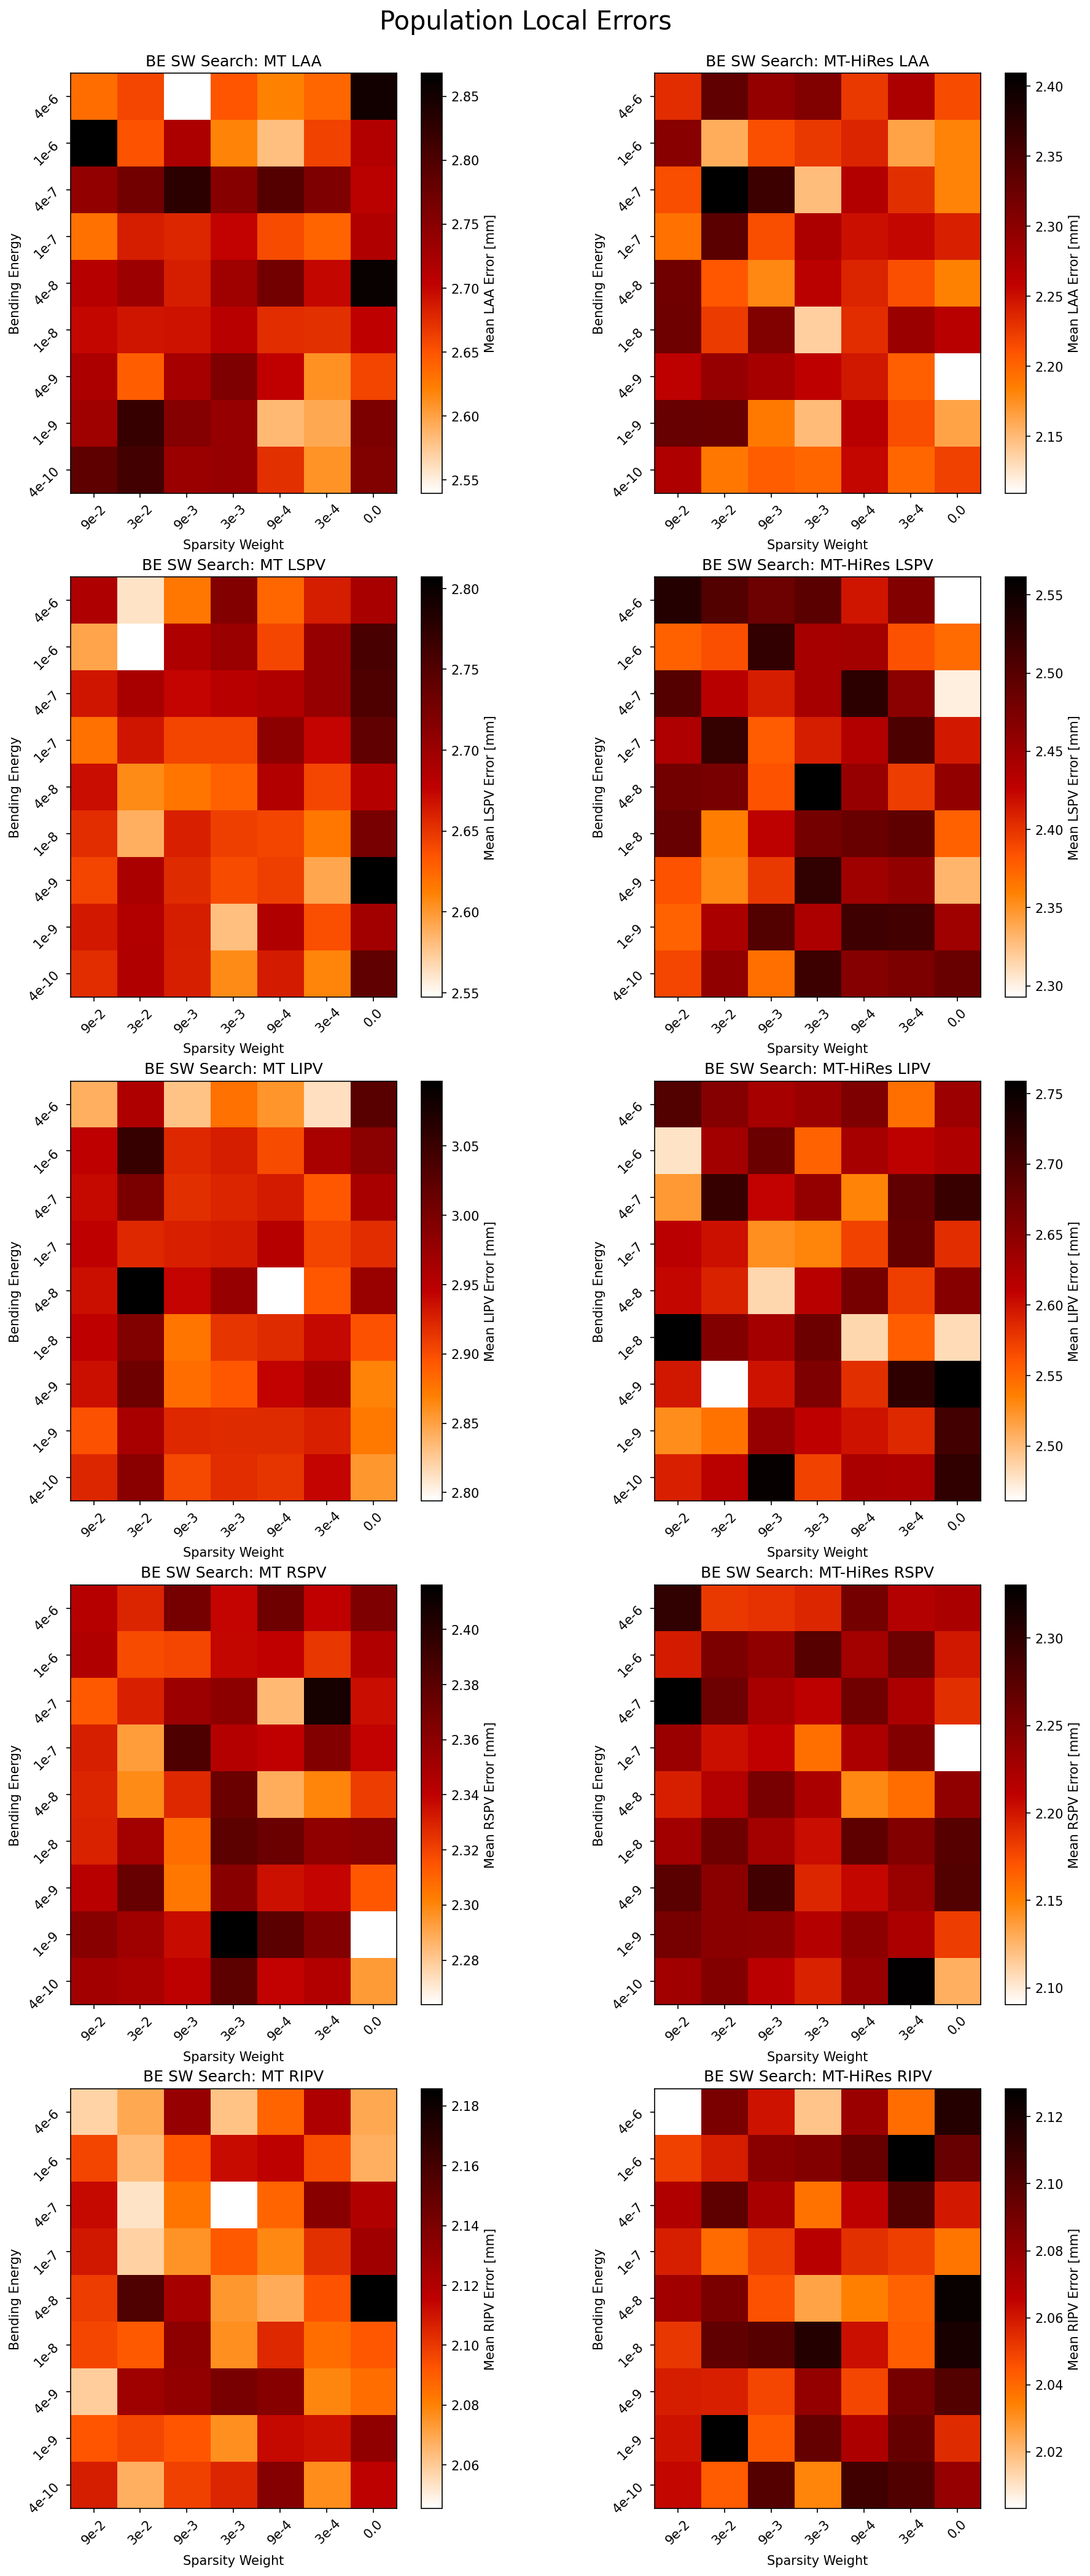

In [12]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(15,35), dpi=150)

Plot_Population_LocalErrors_Axis('MT', 'LAA', ax1)
Plot_Population_LocalErrors_Axis('MT-HiRes', 'LAA', ax2)
Plot_Population_LocalErrors_Axis('MT', 'LSPV', ax3)
Plot_Population_LocalErrors_Axis('MT-HiRes', 'LSPV', ax4)
Plot_Population_LocalErrors_Axis('MT', 'LIPV', ax5)
Plot_Population_LocalErrors_Axis('MT-HiRes', 'LIPV', ax6)

Plot_Population_LocalErrors_Axis('MT', 'RSPV', ax7)
Plot_Population_LocalErrors_Axis('MT-HiRes', 'RSPV', ax8)
Plot_Population_LocalErrors_Axis('MT', 'RIPV', ax9)
Plot_Population_LocalErrors_Axis('MT-HiRes', 'RIPV', ax10)

fig.suptitle('Population Local Errors', fontsize=20, y=0.9)
# plt.rcParams['figure.facecolor'] = 'white'

# plt.savefig('/home/csi20local/Hyperparameter-Figs/Population_LocalErrors', facecolor='w',
#             dpi=150, bbox_inches='tight')

Text(0.5, 0.9, 'Population Local Errors')

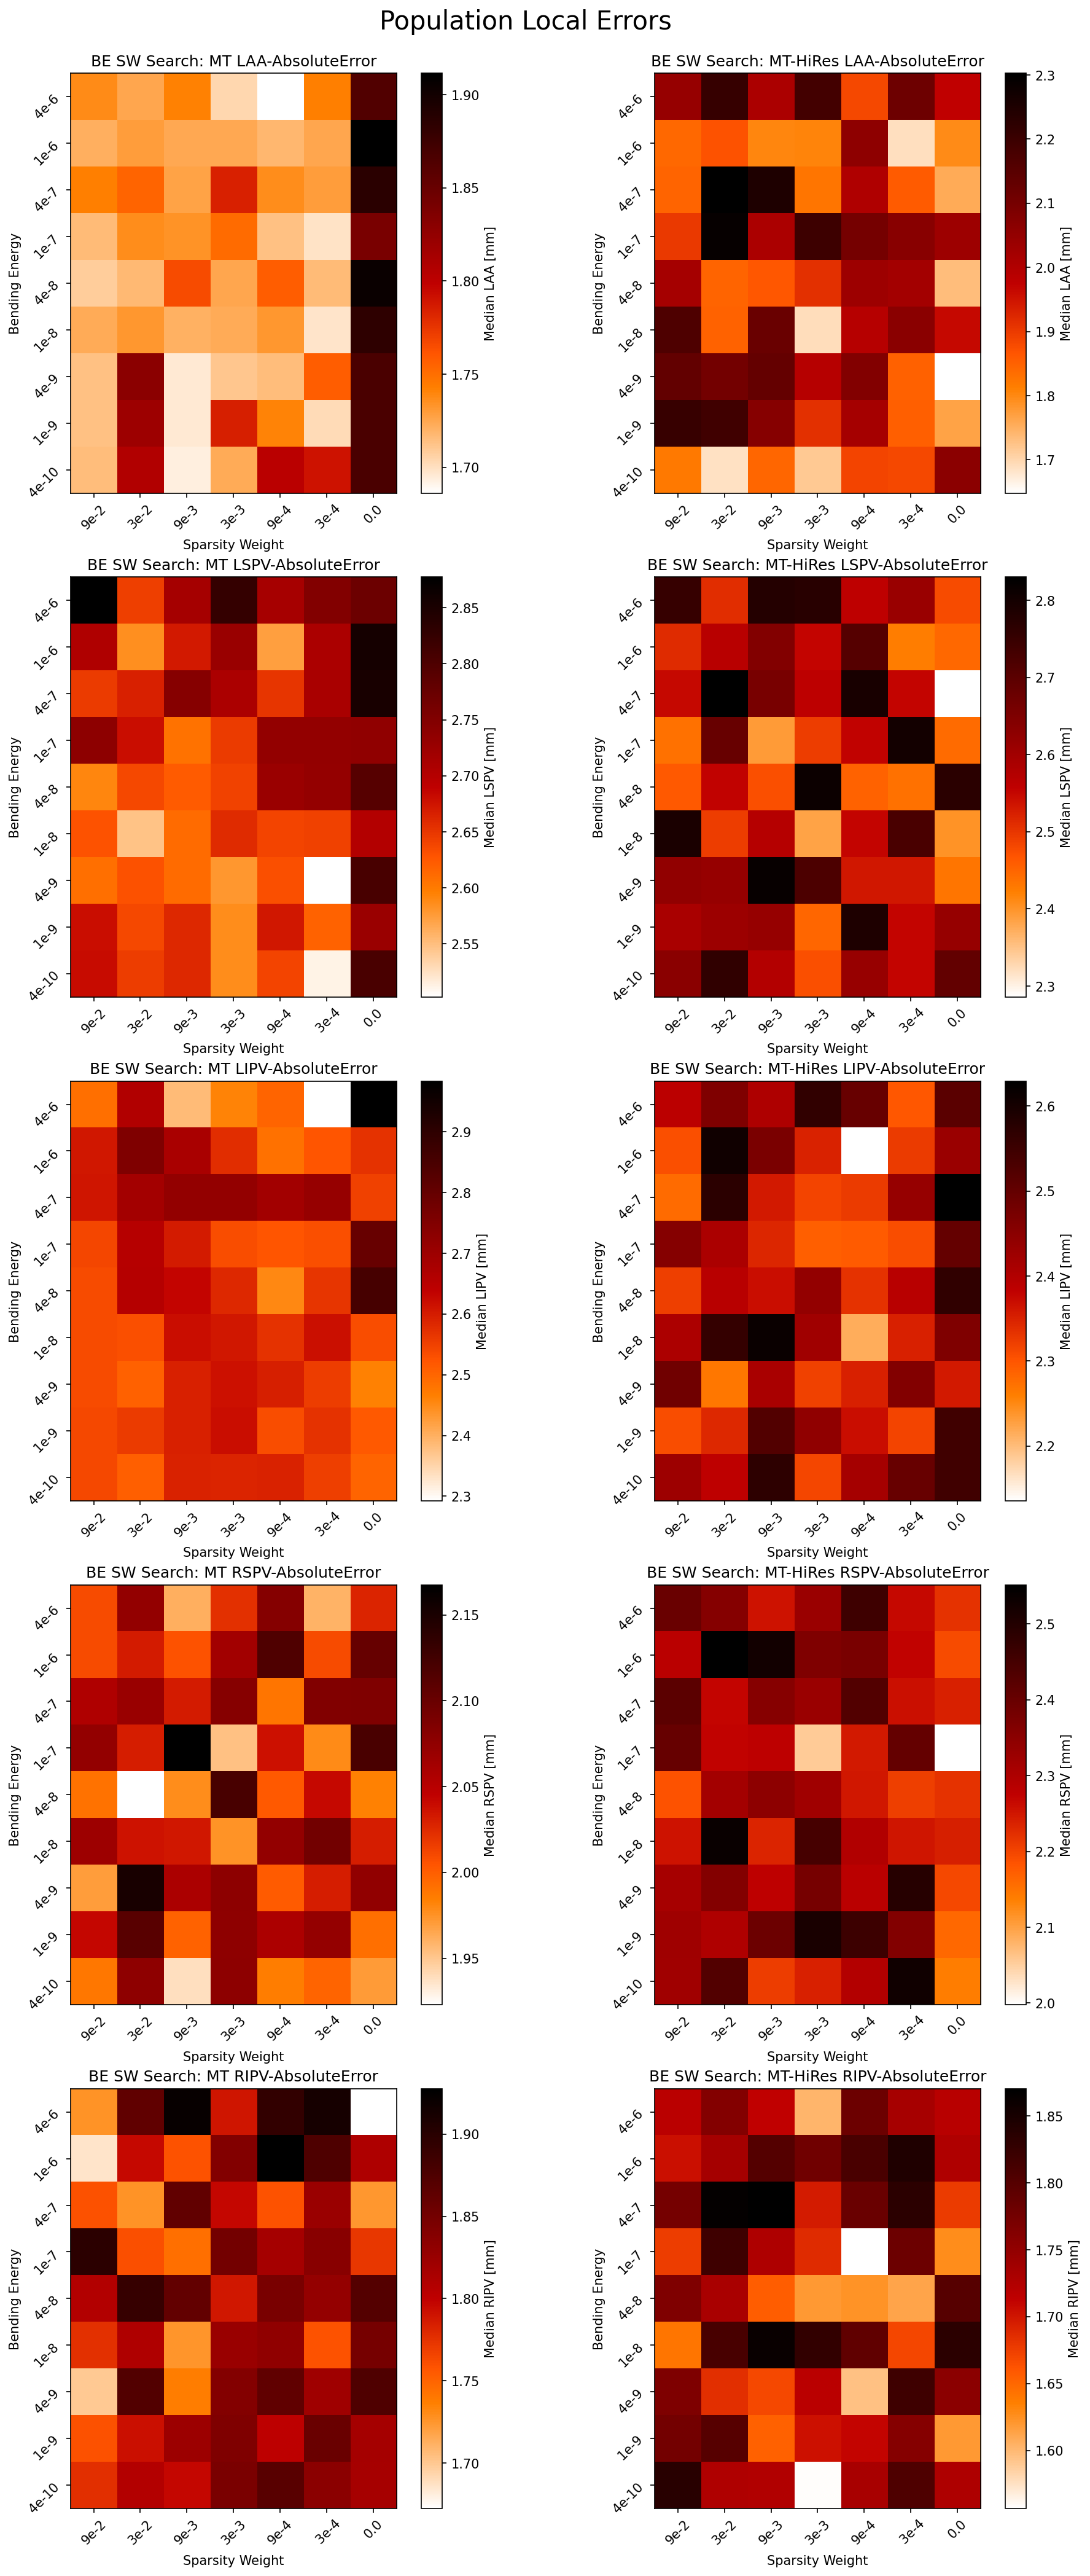

In [21]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(15,35), dpi=150)

Plot_Population_Errors_Median_Axis('MT', 'LAA', ax1)
Plot_Population_Errors_Median_Axis('MT-HiRes', 'LAA', ax2)
Plot_Population_Errors_Median_Axis('MT', 'LSPV', ax3)
Plot_Population_Errors_Median_Axis('MT-HiRes', 'LSPV', ax4)
Plot_Population_Errors_Median_Axis('MT', 'LIPV', ax5)
Plot_Population_Errors_Median_Axis('MT-HiRes', 'LIPV', ax6)

Plot_Population_Errors_Median_Axis('MT', 'RSPV', ax7)
Plot_Population_Errors_Median_Axis('MT-HiRes', 'RSPV', ax8)
Plot_Population_Errors_Median_Axis('MT', 'RIPV', ax9)
Plot_Population_Errors_Median_Axis('MT-HiRes', 'RIPV', ax10)

fig.suptitle('Population Local Errors', fontsize=20, y=0.9)
# plt.rcParams['figure.facecolor'] = 'white'

# plt.savefig('/home/csi20local/Hyperparameter-Figs/Population_LocalErrors_MEDIAN', facecolor='w',
#             dpi=150, bbox_inches='tight')

In [ ]:
for Case in ('01', '02', '05', '06', '07', '08', '12', '15', '16'):
    
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(15,35), dpi=150)

    Plot_Case_LocalErrors_Axis('MT', 'LAA', Case, ax1)
    Plot_Case_LocalErrors_Axis('MT-HiRes', 'LAA', Case, ax2)
    Plot_Case_LocalErrors_Axis('MT', 'LSPV', Case, ax3)
    Plot_Case_LocalErrors_Axis('MT-HiRes', 'LSPV', Case, ax4)
    Plot_Case_LocalErrors_Axis('MT', 'LIPV', Case, ax5)
    Plot_Case_LocalErrors_Axis('MT-HiRes', 'LIPV', Case, ax6)

    Plot_Case_LocalErrors_Axis('MT', 'RSPV', Case, ax7)
    Plot_Case_LocalErrors_Axis('MT-HiRes', 'RSPV', Case, ax8)
    Plot_Case_LocalErrors_Axis('MT', 'RIPV', Case, ax9)
    Plot_Case_LocalErrors_Axis('MT-HiRes', 'RIPV', Case, ax10)

    fig.suptitle(f'Case {Case} Local Errors', fontsize=20, y=0.9)
    # plt.rcParams['figure.facecolor'] = 'white'

#     plt.savefig(f'/home/csi20local/Hyperparameter-Figs/Case{Case}_LocalErrors', facecolor='w',
#                 dpi=150, bbox_inches='tight')

In [ ]:
for Case in ['09']:
    
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(15,35), dpi=150)

    Plot_Case_LocalErrors_Axis('MT', 'LSPV', Case, ax1)
    Plot_Case_LocalErrors_Axis('MT-HiRes', 'LSPV', Case, ax2)
    Plot_Case_LocalErrors_Axis('MT', 'LIPV', Case, ax3)
    Plot_Case_LocalErrors_Axis('MT-HiRes', 'LIPV', Case, ax4)
    Plot_Case_LocalErrors_Axis('MT', 'RSPV', Case, ax5)
    Plot_Case_LocalErrors_Axis('MT-HiRes', 'RSPV', Case, ax6)

    Plot_Case_LocalErrors_Axis('MT', 'RIPV', Case, ax7)
    Plot_Case_LocalErrors_Axis('MT-HiRes', 'RIPV', Case, ax8)

    fig.suptitle(f'Case {Case} Local Errors', fontsize=20, y=0.9)
    # plt.rcParams['figure.facecolor'] = 'white'

#     plt.savefig(f'/home/csi20local/Hyperparameter-Figs/Case{Case}_LocalErrors', facecolor='w',
#                 dpi=150, bbox_inches='tight')

In [ ]:
"""
Plots colormap of mean error across cases in (BE, SW) space.

Input: resolution of registration ('MT' or 'MT-HiRes') and type of Error ('ASD', 'DHD', 'Dice')
Output: colormap plot
"""

# def Plot_Population_GlobalErrors(Res, Error):
    
Res = 'MT-HiRes'    
Res = str(Res)
Cutter = 'LAA'

total_array = np.zeros(shape=(9,7))

if Cutter == 'LAA':
    Cases = ('01', '02', '05', '06', '07', '08', '12', '15', '16')
    
else:
    Cases = ('01', '02', '05', '06', '07', '08', '09', '12', '15', '16')

for Case in Cases:

    df_read = pd.read_csv(f'/home/csi20local/Data/RG_CT_Cases/CT-CRT-{Case}/{Res}-{Cutter}-AbsoluteError.csv', 
                sep = ' ', index_col = 0)

    df_array = df_read.to_numpy()

    total_array = total_array + df_array

total_array = total_array / 10.0

fig, ax1 = plt.subplots(figsize = (3,3))

p = ax1.imshow(total_array, cmap = 'gist_heat_r')

ax1.set_xticks(ticks = list(np.arange(0,7,1)))
ax1.set_xticklabels(labels = ['9e-2', '3e-2', '9e-3', '3e-3', '9e-4', ' 3e-4', '0.0'], rotation=45)
ax1.set_xlabel('Sparsity Weight', fontsize=18)

ax1.set_yticks(ticks = list(np.arange(0,9,1)))
ax1.set_yticklabels(labels = ['4e-6', '1e-6', '4e-7', '1e-7', '4e-8', '1e-8', '4e-9', ' 1e-9', '4e-10'], rotation=45)
ax1.set_ylabel('Bending Energy', fontsize=18)

ax1.set_title(f'BE SW Search: {Res} {Cutter}')

cb = fig.colorbar(p, ax=ax1)
cb.set_label(f'Mean {Cutter} Error [mm]')



plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize = (3,3))

p = ax1.imshow(total_array, origin='lower')

ax1.set_xticks(ticks = list(np.arange(0,7,1)))
ax1.set_xticklabels(labels = ['0.0',' 3e-4', '9e-4', '3e-3', '9e-3', '3e-2', '9e-2'], rotation=45)
ax1.set_xlabel('Sparsity Weight')

ax1.set_yticks(ticks = list(np.arange(0,9,1)))
ax1.set_yticklabels(labels = ['4e-10',' 1e-9', '4e-9', '1e-8', '4e-8', '1e-7', '4e-7', '1e-6', '4e-6'], rotation=45)
ax1.set_ylabel('Bending Energy')

fig.colorbar(p, ax=ax1)

plt.show()

In [ ]:
debug_array = PlotColormap_globalErrors_Distances_DEBUG('MT', 'Normal-Distance-Results')

In [ ]:
debug_array[8][0]

In [ ]:
array, df = PlotColormap_globalErrors_Distances_DEBUG_2('MT', 'Normal-Distance-Results')

In [ ]:
df

In [ ]:
array[8][0]

In [ ]:
array[0][0]

In [ ]:
PlotColormap_globalErrors_Distances_DEBUG_3('MT', 'Normal-Distance-Results')

In [ ]:
Plot_Population_GlobalErrors('MT', 'Dice')

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(18,27), dpi=150)

Plot_Population_GlobalErrors_Axis('MT', 'ASD', ax1)
Plot_Population_GlobalErrors_Axis('MT-HiRes', 'ASD', ax2)
Plot_Population_GlobalErrors_Axis('MT', 'DHD', ax3)
Plot_Population_GlobalErrors_Axis('MT-HiRes', 'DHD', ax4)
Plot_Population_GlobalErrors_Axis('MT', 'Dice', ax5)
Plot_Population_GlobalErrors_Axis('MT-HiRes', 'Dice', ax6)

fig.suptitle('Population Global Errors', fontsize=20, y=0.9)
# plt.rcParams['figure.facecolor'] = 'white'

# plt.savefig('/home/csi20local/Hyperparameter-Figs/Population_GlobalErrors', facecolor='w',
#             dpi=150, bbox_inches='tight')

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(18,27), dpi=150)

Plot_Population_Errors_Median_Axis('MT', 'ASD', ax1)
Plot_Population_Errors_Median_Axis('MT-HiRes', 'ASD', ax2)
Plot_Population_Errors_Median_Axis('MT', 'DHD', ax3)
Plot_Population_Errors_Median_Axis('MT-HiRes', 'DHD', ax4)
Plot_Population_Errors_Median_Axis('MT', 'Dice', ax5)
Plot_Population_Errors_Median_Axis('MT-HiRes', 'Dice', ax6)

fig.suptitle('Population Global Errors', fontsize=20, y=0.9)
# plt.rcParams['figure.facecolor'] = 'white'

# plt.savefig('/home/csi20local/Hyperparameter-Figs/Population_Errors_MEDIAN', facecolor='w',
#             dpi=150, bbox_inches='tight')

In [ ]:

for Case in ['01', '02', '05', '06', '07', '08', '09', '12', '15', '16']:

    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(18,27), dpi=150)


    Plot_Case_GlobalErrors_Axis('MT', 'ASD', f'{Case}', ax1)
    Plot_Case_GlobalErrors_Axis('MT-HiRes', 'ASD', f'{Case}', ax2)
    Plot_Case_GlobalErrors_Axis('MT', 'DHD', f'{Case}', ax3)
    Plot_Case_GlobalErrors_Axis('MT-HiRes', 'DHD', f'{Case}', ax4)
    Plot_Case_GlobalErrors_Axis('MT', 'Dice', f'{Case}', ax5)
    Plot_Case_GlobalErrors_Axis('MT-HiRes', 'Dice', f'{Case}', ax6)

    fig.suptitle(f'Case {Case} Global Errors', fontsize=20, y=0.9)

#     plt.savefig(f'/home/csi20local/Hyperparameter-Figs/Case{Case}_GlobalErrors', facecolor='w',
#                 dpi=150, bbox_inches='tight')